# Load the combined dataframe, and do some plotting 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in the data
df = pd.read_csv("processed_data/sales_and_weather.csv")
# Drop the null values from the variable "temperature_mean"
df = df.dropna(subset=["temperature_mean", "temperature_min", "temperature_max", "precipitation"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 617
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      617 non-null    object 
 1   day_of_week               617 non-null    object 
 2   month                     617 non-null    object 
 3   year                      617 non-null    int64  
 4   week_of_year              617 non-null    int64  
 5   Getränke_sales            617 non-null    float64
 6   Getränke_count            617 non-null    float64
 7   Speisen_sales             617 non-null    float64
 8   Speisen_count             617 non-null    int64  
 9   Sonstiges_sales           617 non-null    float64
 10  Sonstiges_count           617 non-null    int64  
 11  Milchmischgetränke_sales  617 non-null    float64
 12  Milchmischgetränke_count  617 non-null    int64  
 13  Röstkaffee_sales          617 non-null    float64
 14  Röstkaffee

Text(0.5, 1.0, 'Correlation = 0.25985684340736404')

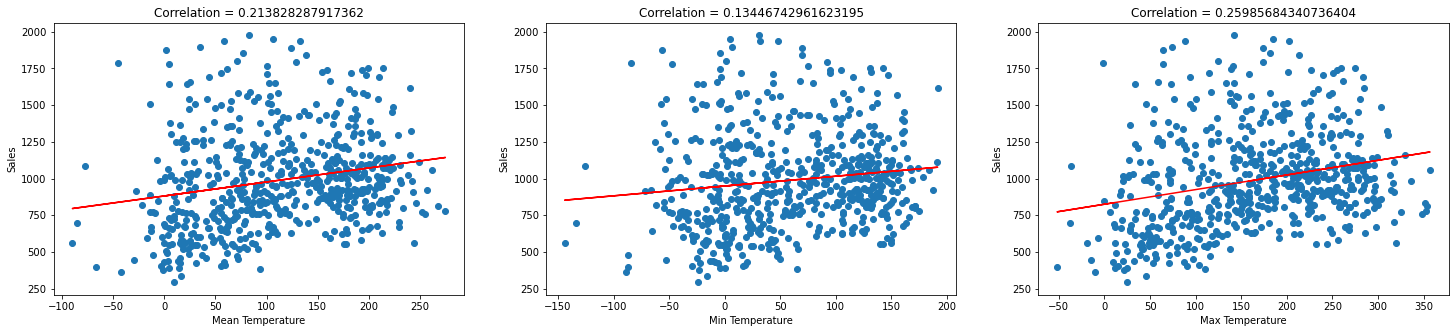

In [2]:
# plot the correlation between sales and mean, min and max temperature
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

axes[0].scatter(df["temperature_mean"], df["Getränke_sales"])
axes[0].set_xlabel("Mean Temperature")
axes[0].set_ylabel("Sales")
# fit a linear regression line with sklearn to plot the line in the plot
from sklearn.linear_model import LinearRegression
X = df["temperature_mean"].values.reshape(-1, 1)
y = df["Getränke_sales"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
axes[0].plot(X, reg.predict(X), color="red")
corr = df["Getränke_sales"].corr(df["temperature_mean"]) # inbuilt function to calculate correlation???
axes[0].set_title("Correlation = {}".format(corr))


axes[1].scatter(df["temperature_min"], df["Getränke_sales"])
axes[1].set_xlabel("Min Temperature")
axes[1].set_ylabel("Sales")
X = df["temperature_min"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
axes[1].plot(X, reg.predict(X), color="red")
corr = df["Getränke_sales"].corr(df["temperature_min"])
axes[1].set_title("Correlation = {}".format(corr))


axes[2].scatter(df["temperature_max"], df["Getränke_sales"])
axes[2].set_xlabel("Max Temperature")
axes[2].set_ylabel("Sales")
X = df["temperature_max"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
axes[2].plot(X, reg.predict(X), color="red")
corr = df["Getränke_sales"].corr(df["temperature_max"])
axes[2].set_title("Correlation = {}".format(corr))



In [3]:
from sklearn.linear_model import LinearRegression

def plot_correlation(df, weather_variable, sales_variable, condition, condition_value, ax):
    df= df[df[condition] == condition_value]
    ax.scatter(df[weather_variable], df[sales_variable])
    ax.set_xlabel(weather_variable)
    ax.set_ylabel(sales_variable)
    X = df[weather_variable].values.reshape(-1, 1)
    y = df[sales_variable].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    ax.plot(X, reg.predict(X), color="red")
    corr = df[sales_variable].corr(df[weather_variable])
    ax.set_title(f"{condition}-{condition_value}: Corr = {corr.round(2)}")

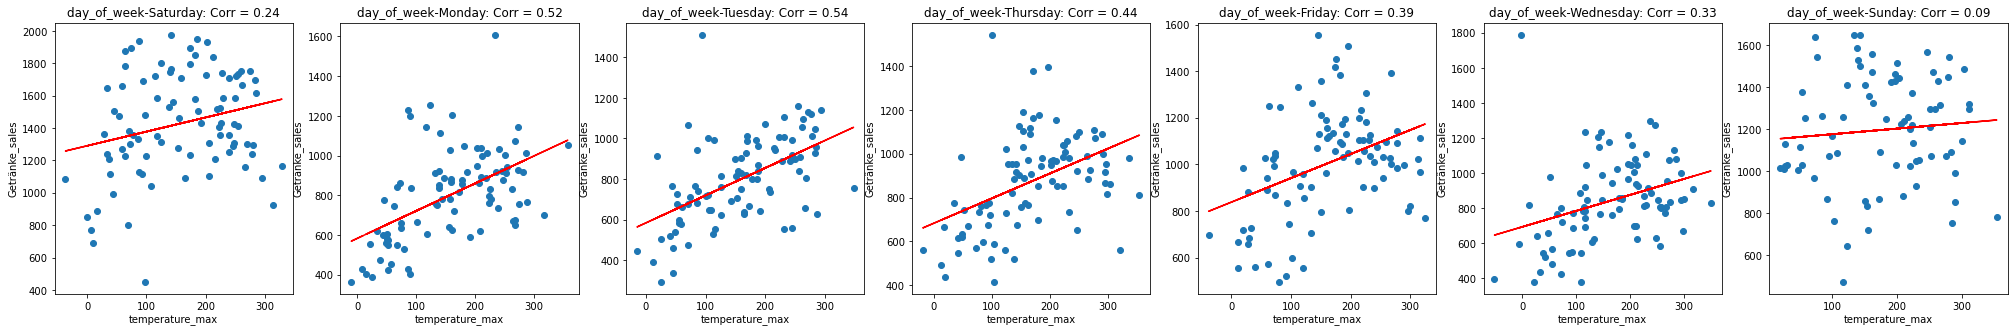

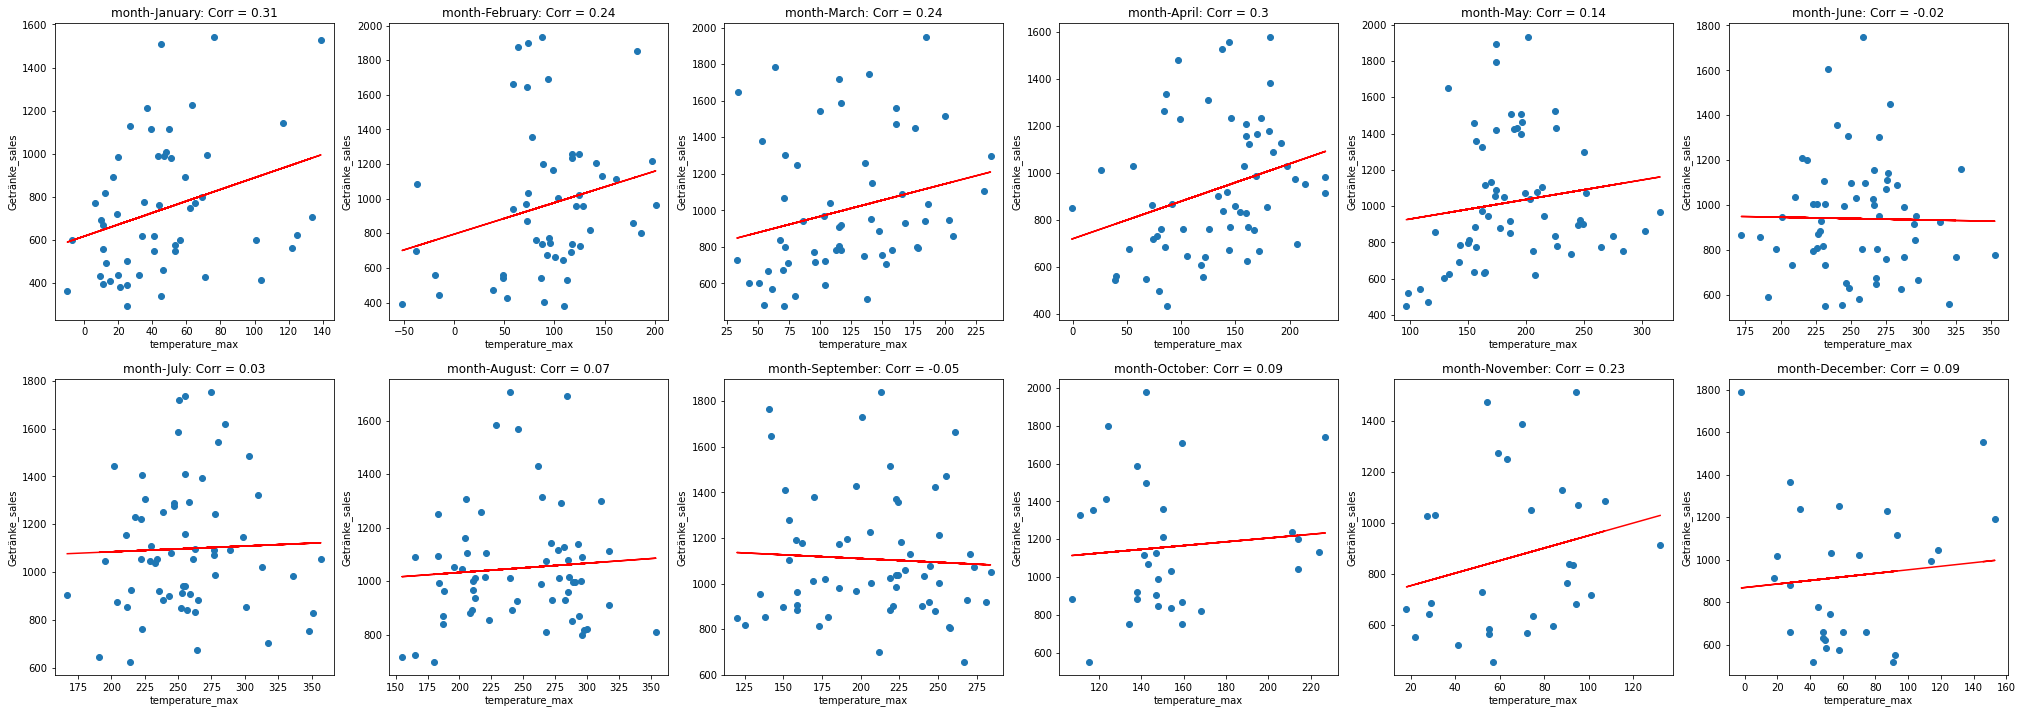

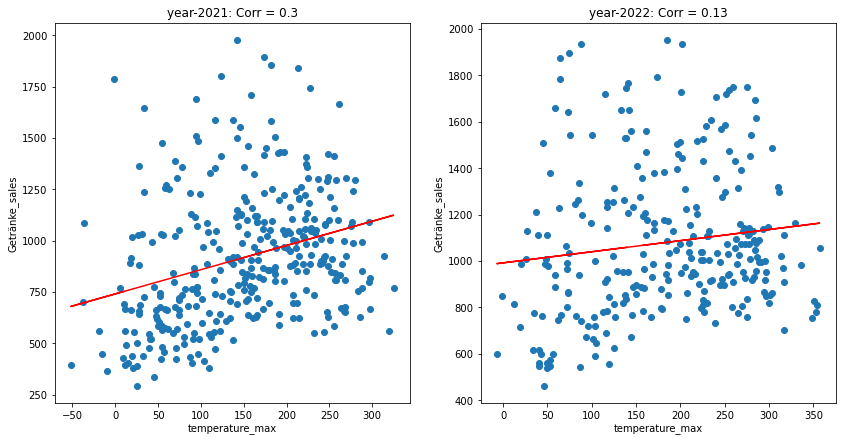

In [5]:
weather_variable = "temperature_max"

sales_variable = "Getränke_sales"


# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(35, 5))
for i, day in enumerate(df["day_of_week"].unique()):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i])
plt.show()

# Plot the correlation between the max temperature and the sales for each month of the year
fig, axes = plt.subplots(2, 6, figsize=(35, 12))
for i, month in enumerate(df["month"].unique()):
    j = 1 if i >= 6 else 0
    i = i - 6 if i >= 6 else i
    plot_correlation(df, weather_variable, sales_variable, "month", month, axes[j, i])
plt.show()

# Plot the correlation between the max temperature and the sales for each year
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
for i, year in enumerate(df["year"].unique()):
    plot_correlation(df, weather_variable, sales_variable, "year", year, axes[i])
plt.show()

In [11]:
# print the day where the sales were the highest
print("The day with the highest sales was {}".format(df["date"][df["Getränke_sales"].idxmax()]))
# which weekday was this?
print("This was a {}".format(df["day_of_week"][df["Getränke_sales"].idxmax()]))

The day with the highest sales was 2021-10-16
This was a Saturday


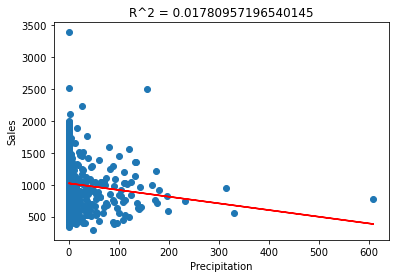

In [31]:
# plot the correlation between sales and precipitation
plt.scatter(df["precipitation"], df["Getränke_sales"])
plt.xlabel("Precipitation")
plt.ylabel("Sales")
X = df["precipitation"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color="red")
plt.title("R^2 = {}".format(reg.score(X, y))) # diffent way to calculate correlation???
plt.show()

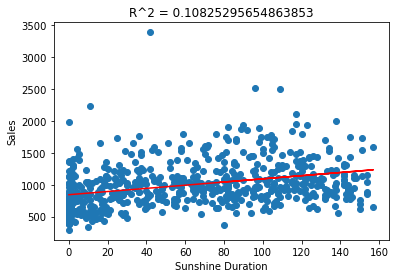

In [32]:
# plot the correlation between sales and sunshine
plt.scatter(df["sunshine_duration"], df["Getränke_sales"])
plt.xlabel("Sunshine Duration")
plt.ylabel("Sales")
X = df["sunshine_duration"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color="red")
plt.title("R^2 = {}".format(reg.score(X, y)))
plt.show()

In [4]:
# calculate the correlation between sales and mean temperature
corr = df["Getränke_sales"].corr(df["temperature_mean"])
print("Correlation between sales and mean temperature: {:.2f}".format(corr))

corr = df["Getränke_sales"].corr(df["temperature_min"])
print("Correlation between sales and min temperature: {:.2f}".format(corr))

corr = df["Getränke_sales"].corr(df["temperature_max"])
print("Correlation between sales and max temperature: {:.2f}".format(corr))

# 



Correlation between sales and mean temperature: 0.20
Correlation between sales and min temperature: 0.05
Correlation between sales and max temperature: 0.30


# Verschiende (absolut unnötige!) Experimente mit MLPs
#

Train data
Mean: [949.91726592], Std: [404.25934273]
Test data
Mean: [917.70134328], Std: [365.87704168]
Best loss: 0.93
Epoch: 0, Train Loss: 0.98, Test Loss: 0.93
Best loss: 0.89
Best loss: 0.84
Best loss: 0.68
Best loss: 0.67
Best loss: 0.59
Epoch: 10, Train Loss: 0.76, Test Loss: 0.59
Epoch: 20, Train Loss: 0.75, Test Loss: 0.72
Epoch: 30, Train Loss: 0.74, Test Loss: 0.64
Best loss: 0.58
Epoch: 40, Train Loss: 0.74, Test Loss: 0.64
Epoch: 50, Train Loss: 0.77, Test Loss: 1.34
Epoch: 60, Train Loss: 0.71, Test Loss: 0.65
Epoch: 70, Train Loss: 0.72, Test Loss: 0.63
Epoch: 80, Train Loss: 0.73, Test Loss: 0.69
Epoch: 90, Train Loss: 0.75, Test Loss: 0.60
Best loss: 0.58


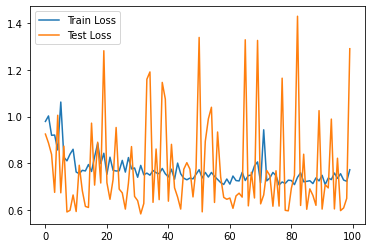

In [4]:
# now build a pytorch pipeline to predict sales based on only weather data
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# define a dataset class
class SalesDataset(Dataset):
    def __init__(self, df):
        self.df = df
        self.X = df[["temperature_mean", "temperature_min", "temperature_max", "precipitation", "sunshine_duration"]].values
        self.y = df["Getränke_sales"].values.reshape(-1, 1)
       
        # normalize the data
        self.X = (self.X - self.X.mean(axis=0)) / self.X.std(axis=0)
        mu = self.y.mean(axis=0)
        sigma = self.y.std(axis=0)
        self.y = (self.y - mu) / sigma
        print("Mean: {}, Std: {}".format(mu, sigma))

        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# split the data into train and test set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# create the dataset objects with normalized data
print("Train data")
train_dataset = SalesDataset(train_df)
print("Test data")
test_dataset = SalesDataset(test_df)

# create the dataloader objects
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# define the model parameters
input_size = 5
hidden_size = 32
output_size = 1

# define the model
class SalesModel(nn.Module):
    def __init__(self):
        super(SalesModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# create the model object
model = SalesModel()

# define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
lr_scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

# train the model and visualize the loss
epochs = 100
train_losses = []
test_losses = []
best_loss = np.inf

for epoch in range(epochs):
    train_loss = 0.0
    test_loss = 0.0
    model.train()
    for X, y in train_loader:
        optimizer.zero_grad()
        y_pred = model(X.float())
        loss = criterion(y_pred, y.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    # test the model
    model.eval()
    with torch.no_grad():
        for X, y in test_loader:
            y_pred = model(X.float())
            loss = criterion(y_pred, y.float())
            test_loss += loss.item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
    
    if test_loss < best_loss:
        best_loss = test_loss
        print("Best loss: {:.2f}".format(best_loss))
    
    if epoch % 10 == 0:
        print("Epoch: {}, Train Loss: {:.2f}, Test Loss: {:.2f}".format(epoch, train_loss, test_loss))
    
    lr_scheduler.step()
    
   
    
print("Best loss: {:.2f}".format(best_loss))
# plot the loss
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()
model1 = model

Train data
Mean: [949.91726592], Std: [404.25934273]
Test data
Mean: [917.70134328], Std: [365.87704168]
Best loss: 1.13
Epoch: 0, Train Loss: 1.00, Test Loss: 1.13
Best loss: 0.75
Best loss: 0.74
Best loss: 0.62
Best loss: 0.35
Best loss: 0.27
Epoch: 10, Train Loss: 0.41, Test Loss: 0.32
Best loss: 0.26
Best loss: 0.24
Epoch: 20, Train Loss: 0.38, Test Loss: 0.28
Best loss: 0.24
Best loss: 0.23
Epoch: 30, Train Loss: 0.39, Test Loss: 0.31
Best loss: 0.23
Best loss: 0.22
Epoch: 40, Train Loss: 0.35, Test Loss: 0.28
Epoch: 50, Train Loss: 0.41, Test Loss: 0.43
Best loss: 0.22
Epoch: 60, Train Loss: 0.32, Test Loss: 0.24
Epoch: 70, Train Loss: 0.32, Test Loss: 0.45
Best loss: 0.22
Epoch: 80, Train Loss: 0.34, Test Loss: 0.22
Epoch: 90, Train Loss: 0.31, Test Loss: 0.23
Best loss: 0.22


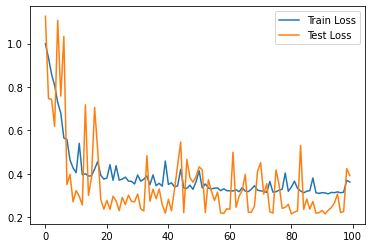

In [6]:
# define a seconde dataset class to predict sales with the day of the week
class SalesDataset2(Dataset):
    def __init__(self, df):
        self.df = df 
        self.X = {"weather": df[["temperature_mean", "temperature_min", "temperature_max", "precipitation", "sunshine_duration"]].values, 
                    "date": pd.get_dummies(df["day_of_week"]).values}
        self.y = df["Getränke_sales"].values.reshape(-1, 1)
       
        # normalize the data (X is a dictionary, so we need to normalize each column separately
        self.X["weather"] = (self.X["weather"] - self.X["weather"].mean(axis=0)) / self.X["weather"].std(axis=0)
        mu = self.y.mean(axis=0)
        sigma = self.y.std(axis=0)
        self.y = (self.y - mu) / sigma
        print("Mean: {}, Std: {}".format(mu, sigma))

        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        return self.X["weather"][idx], self.X["date"][idx], self.y[idx]

# split the data into train and test set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# create the dataset objects with normalized data
print("Train data")
train_dataset = SalesDataset2(train_df)
print("Test data")
test_dataset = SalesDataset2(test_df)

# create the dataloader objects
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# define the model parameters
input_size_weather = 5
input_size_date = 7
hidden_size = 32
output_size = 1

# define the model
class SalesModel2(nn.Module):
    def __init__(self):
        super(SalesModel2, self).__init__()
        self.fc1 = nn.Linear(input_size_weather, hidden_size)
        self.fc2 = nn.Linear(input_size_date, hidden_size)
        self.fc3 = nn.Linear(hidden_size*2,  hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc5 = nn.Linear(hidden_size, output_size)
        
        
        
    def forward(self, x_weather, x_date):
        x_weather = F.relu(self.fc1(x_weather))
        x_date = F.relu(self.fc2(x_date))
        x = torch.cat((x_weather, x_date), dim=1)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        
        return x

# create the model object
model = SalesModel2()

# define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
lr_scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

# train the model and visualize the loss
epochs = 100
train_losses = []
test_losses = []
best_loss = np.inf

for epoch in range(epochs):
    train_loss = 0.0
    test_loss = 0.0
    model.train()
    for X_weather, X_date, y in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_weather.float(), X_date.float())
        loss = criterion(y_pred, y.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    model.eval()
    with torch.no_grad():
        for X_weather, X_date, y in test_loader:
            y_pred = model(X_weather.float(), X_date.float())
            loss = criterion(y_pred, y.float())
            test_loss += loss.item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

    if test_loss < best_loss:
        best_loss = test_loss
        print("Best loss: {:.2f}".format(best_loss))
    
    if epoch % 10 == 0:
        print("Epoch: {}, Train Loss: {:.2f}, Test Loss: {:.2f}".format(epoch, train_loss, test_loss))
    
    lr_scheduler.step()

print("Best loss: {:.2f}".format(best_loss))
# plot the loss
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()
model2 = model

Train data
Mean: [949.91726592], Std: [404.25934273]
Test data
Mean: [917.70134328], Std: [365.87704168]
Best loss: 0.86
Epoch: 0, Train Loss: 0.96, Test Loss: 0.86
Best loss: 0.74
Best loss: 0.56
Best loss: 0.49
Best loss: 0.44
Epoch: 10, Train Loss: 0.64, Test Loss: 0.75
Best loss: 0.41
Best loss: 0.40
Epoch: 20, Train Loss: 0.59, Test Loss: 0.40
Best loss: 0.40
Epoch: 30, Train Loss: 0.60, Test Loss: 0.47
Best loss: 0.39
Epoch: 40, Train Loss: 0.61, Test Loss: 0.76
Epoch: 50, Train Loss: 0.60, Test Loss: 0.45
Epoch: 60, Train Loss: 0.60, Test Loss: 0.64
Epoch: 70, Train Loss: 0.60, Test Loss: 0.48
Epoch: 80, Train Loss: 0.64, Test Loss: 0.42
Epoch: 90, Train Loss: 0.62, Test Loss: 0.63
Best loss: 0.39


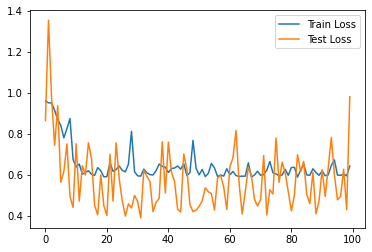

In [7]:
# define a third dataset class to predict sales with only the day of the week
class SalesDataset3(Dataset):
    def __init__(self, df):
        self.df = df 
        self.X = pd.get_dummies(df["day_of_week"]).values
        self.y = df["Getränke_sales"].values.reshape(-1, 1)
       
        # normalize the data
        mu = self.y.mean(axis=0)
        sigma = self.y.std(axis=0)
        self.y = (self.y - mu) / sigma
        print("Mean: {}, Std: {}".format(mu, sigma))

        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# split the data into train and test set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# create the dataset objects with normalized data
print("Train data")
train_dataset = SalesDataset3(train_df)
print("Test data")
test_dataset = SalesDataset3(test_df)

# create the dataloader objects
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# define the model parameters
input_size = 7
hidden_size = 32
output_size = 1

# define the model
class SalesModel3(nn.Module):
    def __init__(self):
        super(SalesModel3, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# create the model object
model = SalesModel3()

# define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
lr_scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

# train the model and visualize the loss
epochs = 100
train_losses = []
test_losses = []
best_loss = np.inf

for epoch in range(epochs):
    train_loss = 0.0
    test_loss = 0.0
    model.train()
    for X, y in train_loader:
        optimizer.zero_grad()
        y_pred = model(X.float())
        loss = criterion(y_pred, y.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    model.eval()
    with torch.no_grad():
        for X, y in test_loader:
            y_pred = model(X.float())
            loss = criterion(y_pred, y.float())
            test_loss += loss.item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

    if test_loss < best_loss:
        best_loss = test_loss
        print("Best loss: {:.2f}".format(best_loss))
    
    if epoch % 10 == 0:
        print("Epoch: {}, Train Loss: {:.2f}, Test Loss: {:.2f}".format(epoch, train_loss, test_loss))
    
    lr_scheduler.step()

print("Best loss: {:.2f}".format(best_loss))
# plot the loss
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()
model3 = model

In [8]:
dataset = SalesDataset2(df)
day = 144+7
print(dataset.X["date"][day])
print(dataset.X["weather"][day])
print(dataset.y[day])
print(df[day:day+1])

Mean: [943.45479042], Std: [397.06728086]
[0 0 1 0 0 0 0]
[ 0.54893897  0.48316318  0.62860827 -0.43433035 -0.12359229]
[6.15196801]
           date day_of_week    month  year  week_of_year  Getränke_sales  \
272  2021-10-16    Saturday  October  2021            41          3386.2   

     Getränke_count  Speisen_sales  Speisen_count  Sonstiges_sales  ...  \
272            1427         1184.4            363            782.5  ...   

     precipitation  temperature_mean  temperature_max  temperature_min  \
272            0.0              83.0            142.0             31.0   

     sunshine_duration  cloud_cover  wind_speed  humidity  pressure  \
272               42.0          4.0        12.0      86.0   10215.0   

     snow_depth  
272         0.0  

[1 rows x 37 columns]


In [9]:
# test manually to see if the day of the week makes a difference in the prediction


pred1 = model1(torch.tensor([0.54893897,  0.48316318,  0.62860827, -0.43433035, -0.12359229]).float().unsqueeze(0))
pred2 = model2(torch.tensor([0.54893897,  0.48316318,  0.62860827, -0.43433035, -0.12359229]).float().unsqueeze(0), torch.tensor([0, 0, 1, 0, 0, 0, 0]).float().unsqueeze(0))
pred3 = model3(torch.tensor([0, 0, 1, 0, 0, 0, 0]).float().unsqueeze(0))
print(pred1)
print(pred2)
print(pred3)
# un-normalize the data
mu = 949.91726592
sigma = 404.25934273
pred1 = pred1.item() * sigma + mu
pred2 = pred2.item() * sigma + mu
pred3 = pred3.item() * sigma + mu

print("Prediction 1: {:.2f}".format(pred1))
print("Prediction 2: {:.2f}".format(pred2))
print("Prediction 3: {:.2f}".format(pred3))


tensor([[0.3553]], grad_fn=<AddmmBackward>)
tensor([[2.1272]], grad_fn=<AddmmBackward>)
tensor([[1.2111]], grad_fn=<AddmmBackward>)
Prediction 1: 1093.54
Prediction 2: 1809.87
Prediction 3: 1439.53
